In [61]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
df = pd.read_csv("dataset/WineData.csv")
df.head()

,ID,Brand,FA,VA,CA,RS,chloride,FSD,TSD,density,pH,sulphate,alcohol
0,1,Seagram,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,Seagram,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,Seagram,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,Sula Vineyards,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,Seagram,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [63]:
count = 1
for i in df["Brand"].unique():
    df.loc[(df["Brand"] == i), "Brand"] = count
    count+=1

In [64]:
df["Brand"] = df["Brand"].astype("int8")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1599 non-null   int64  
 1   Brand     1599 non-null   int8   
 2   FA        1599 non-null   float64
 3   VA        1599 non-null   float64
 4   CA        1599 non-null   float64
 5   RS        1599 non-null   float64
 6   chloride  1599 non-null   float64
 7   FSD       1599 non-null   float64
 8   TSD       1599 non-null   float64
 9   density   1599 non-null   float64
 10  pH        1599 non-null   float64
 11  sulphate  1599 non-null   float64
 12  alcohol   1599 non-null   float64
dtypes: float64(11), int64(1), int8(1)
memory usage: 151.6 KB


In [66]:
df.pop("ID")

0          1
1          2
2          3
3          4
4          5
        ... 
1594    1595
1595    1596
1596    1597
1597    1598
1598    1599
Name: ID, Length: 1599, dtype: int64

In [67]:
df.head()

,Brand,FA,VA,CA,RS,chloride,FSD,TSD,density,pH,sulphate,alcohol
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [68]:
y = df.pop("alcohol")
X = df.copy()

In [102]:
class MultiLinearRegression:
    def __init__(self):
        self._coef = None
        self._intercept = None
    
    def fit(self,X,y):
        X = np.insert(np.array(X),0,1,axis = 1)   
        self.beta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
        
    def predict(self, X):
        X = np.insert(np.array(X),0,1,axis = 1)
        y_hat = np.dot(X,np.expand_dims(np.array(self.beta),axis=1))
        return y_hat.ravel()

In [103]:
mlr =MultiLinearRegression()
mlr.fit(X,y)

In [104]:
y_hat = mlr.predict(X)

In [105]:
y_hat

array([ 9.55277105,  9.51034599,  9.529343  , ..., 10.3180465 ,
       10.60368088, 10.68632127])

In [106]:
from sklearn.metrics import r2_score

r2_score(y,y_hat)

0.6766614705735867

<AxesSubplot: xlabel='alcohol'>

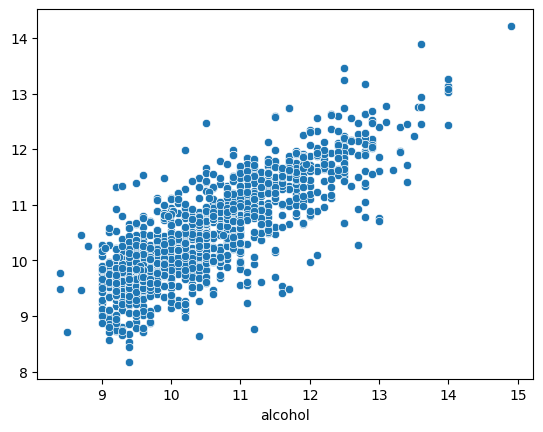

In [107]:
sns.scatterplot(x = y, y =y_hat)